In [291]:
###### Install & Import libraries ######

import sys
import subprocess
import pkg_resources

required = {'scikit-learn','pandas', 'numpy', 'matplotlib','datetime','seaborn', 'torch'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)
   

#######################################################################################################
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math
import os
import sklearn
import Functions_Zurich as FZ
##################################################################################################################
#pd.options.display.float_format = '${:,.0f}'.format

###### Set your Path ######


path = "/Users/roboz.DESKTOP-F86F289/Desktop/Case_study_data/Data_auto_insurance"
os.chdir(path)
##################################################################################################################

###### Load Data ######
df_historical=pd.read_csv("auto_policies_2022.csv",parse_dates=True)
df_2023=pd.read_csv("auto_potential_customers_2023.csv",parse_dates=True)
##################################################################################################################

In [292]:
#Column Types#
df_historical.dtypes

pol_number          int64
pol_eff_dt         object
gender             object
agecat            float64
date_of_birth      object
credit_score      float64
area               object
traffic_index     float64
veh_age             int64
veh_body           object
veh_value         float64
claim_office       object
numclaims           int64
claimcst0          object
annual_premium    float64
age                 int64
dtype: object

In [293]:
#Check first 10 rows of data#
df_historical.head(10)

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium,age
0,64080188,7/10/2017,M,$2,1/4/1989,$631,B,$141,4,TRUCK,$1,NaN,0,0,$717,34
1,18917133,7/31/2017,M,$2,6/21/1985,$531,C,$136,3,HBACK,$1,B,1,583,$717,37
2,82742606,2/1/2017,M,$6,7/25/1942,$838,D,$89,3,SEDAN,$1,D,1,159,$717,80
3,43601997,10/17/2017,M,$5,6/8/1959,$835,E,NaN,2,SEDAN,$2,NaN,0,0,$717,63
4,58746861,4/13/2017,F,$4,5/16/1967,$748,C,$123,3,HBACK,$1,C,1,144,$717,55
5,83346346,11/23/2017,M,$5,11/2/1956,$785,B,$109,2,SEDAN,$2,NaN,0,0,$717,66
6,92111059,11/29/2017,M,$3,10/31/1976,$759,E,$75,4,STNWG,$1,NaN,0,0,$717,46
7,69967688,4/24/2017,F,NaN,11/27/1947,$836,C,$88,1,HBACK,$1,NaN,0,0,$717,75
8,58856161,7/19/2017,M,NaN,3/12/1967,$688,A,$50,1,SEDAN,$3,NaN,0,0,$717,56
9,57786319,8/31/2017,M,NaN,12/25/1984,$503,B,NaN,3,HBACK,$2,B,1,"1,039",$717,38


In [294]:
#Check first 10 rows of data#
df_2023.head(10)

,quote_number,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value
0,29323463,F,$4,4/14/1968,$750,C,$124,2,HBACK,$1
1,16732441,M,$2,10/4/1984,$567,F,NaN,3,STNWG,$2
2,68744228,M,$4,11/30/1962,$378,D,$111,3,HDTOP,$2
3,30875047,F,$3,5/17/1973,$807,E,NaN,4,UTE,$2
4,37049210,M,$6,10/2/1945,$844,C,$111,1,HBACK,$2
5,90859532,M,$1,1/19/1995,$743,C,$134,1,HBACK,$2
6,58572612,M,$5,3/27/1953,$647,F,$156,3,HDTOP,$3
7,32679788,M,$4,9/20/1964,$785,A,NaN,2,SEDAN,$2
8,90845095,F,$1,1/17/1999,$601,B,$105,2,HBACK,$1
9,97453004,F,$3,12/2/1979,$672,C,$146,2,STNWG,$4


In [295]:
#Changing effective date from 2017->2022, Assuming there is wrong year of pol_eff_dt (2017 in data set), Assigment description : "personal auto insurance policies taken out in 2022" #
df_historical['pol_eff_dt'] = df_historical['pol_eff_dt'].str.replace('2017','2022')
df_historical.isnull().sum()

pol_number            0
pol_eff_dt            0
gender                0
agecat             4831
date_of_birth         0
credit_score       2801
area                  0
traffic_index      3503
veh_age               0
veh_body              0
veh_value             0
claim_office      50362
numclaims             0
claimcst0             0
annual_premium        0
age                   0
dtype: int64

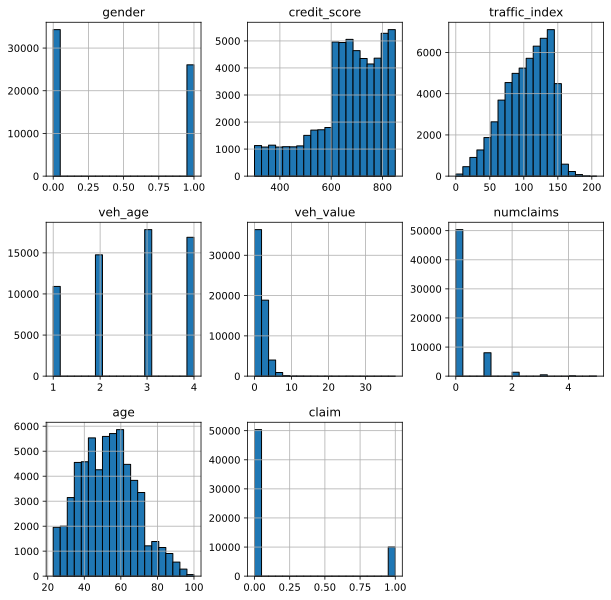

In [296]:
ten_thousand = 10000

###### DataFrame Transformation for historgram plots ###### 
df_historical_plot = df_historical.copy()
df_historical_plot["claim"] = df_historical_plot["numclaims"].apply(FZ.claim)
df_historical_plot['claimcst0'] = df_historical_plot['claimcst0'].apply(lambda x: x.replace(',',''))
df_historical_plot['claimcst0'] = df_historical_plot['claimcst0'].astype(float)
df_historical_plot["gender"] = df_historical_plot["gender"].apply(FZ.gender)
#df_historical_plot['veh_value'] = df_historical_plot['veh_value']*ten_thousand

df_historical_plot = df_historical_plot.drop(['pol_number','annual_premium','agecat', 'claimcst0'],axis = 1)

pd.DataFrame.hist(df_historical_plot, figsize = [10,10], bins = 20, xlabelsize = 10, edgecolor='black');

##############################################################################################################################

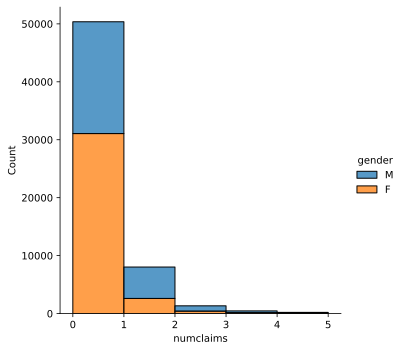

In [297]:
###### barplot of claim count based on gender and numclaims,numclaims([0-5])  ######
sns.displot(data=df_historical,x='numclaims',bins=5,kde=False, color='blue',edgecolor='black',lw=1,ls='-', hue='gender', multiple='stack')
#sns.histplot(data=df_historical,x='numclaims',bins=5)
#plt.figure(figsize=(12,12),dpi=150)

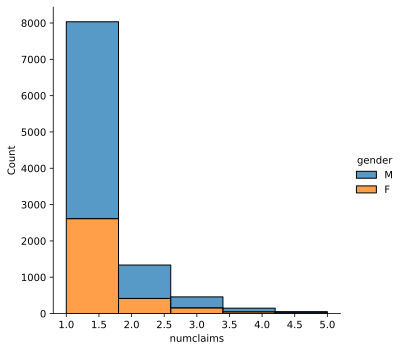

In [298]:
###### barplot of claim count based on gender and numclaims,numclaims([1-5]) ######
sns.displot(data=df_historical[df_historical['numclaims']>0],x='numclaims',bins=5,kde=False, color='blue',edgecolor='black',lw=1,ls='-', hue='gender', multiple='stack')
#sns.histplot(data=df_historical,x='numclaims',bins=5)
#plt.figure(figsize=(12,12),dpi=150)

<AxesSubplot: title={'center': 'Histogram of Vehicle Values in $'}>

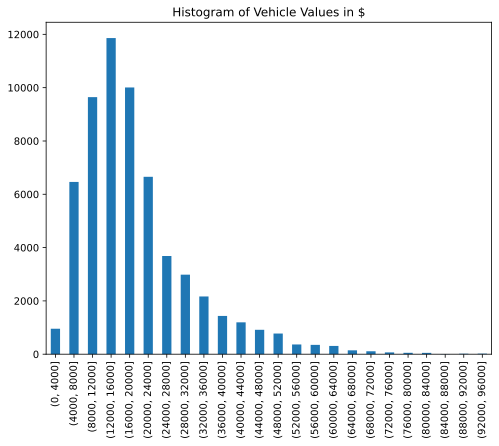

In [299]:
###### Histogram of Vehicle Value based between 0-100000$ ######
df_historical_plot['veh_value'] = df_historical_plot['veh_value']*ten_thousand
fig,ax = plt.subplots(figsize=(8, 6))
ax.set_title('Histogram of Vehicle Values in $')
(
pd.cut(df_historical_plot['veh_value'], bins=np.arange(0, 100000, 4000))
    .value_counts()
    .sort_index()
    .plot.bar(ax=ax)
    
)

C:\Users\roboz.DESKTOP-F86F289\AppData\Local\Temp\ipykernel_20408\577991880.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_historical_plot_corr =df_historical_plot.corr().round(2)


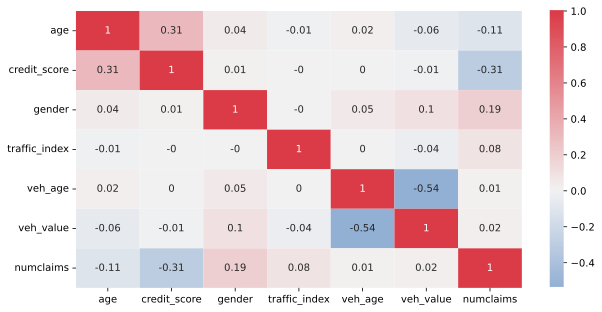

In [300]:
###### Correlation of variables ###### 
df_historical_plot = df_historical_plot.drop(['claim'],axis = 1)
df_historical_plot['veh_value'] = df_historical_plot['veh_value']
df_historical_plot = df_historical_plot.reindex(sorted(df_historical_plot.columns), axis=1)
col = df_historical_plot.pop("numclaims")
df_historical_plot["numclaims"] = col
df_historical_plot_corr =df_historical_plot.corr().round(2)
fig = plt.figure(figsize=(10,5));
sns.heatmap(df_historical_plot_corr, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

##############################################################################################################################

<Figure size 400x400 with 0 Axes>

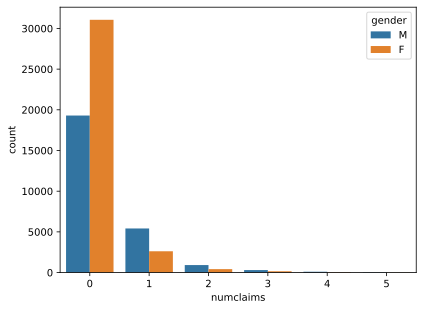

<Figure size 400x400 with 0 Axes>

In [302]:
###### Number of [0-5] claims across gender  ###### 
sns.countplot(x='numclaims',data=df_historical, hue='gender')
plt.figure(figsize=(4,4),dpi=100)

<Figure size 400x400 with 0 Axes>

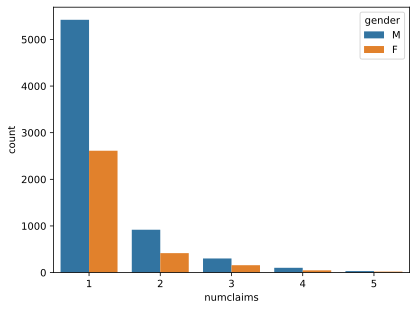

<Figure size 400x400 with 0 Axes>

In [301]:
###### Number of [1-5] claims across gender  ###### 
sns.countplot(x='numclaims',data=df_historical[df_historical['numclaims']>0], hue='gender')
plt.figure(figsize=(4,4),dpi=100)

<AxesSubplot: xlabel='credit_score', ylabel='numclaims'>

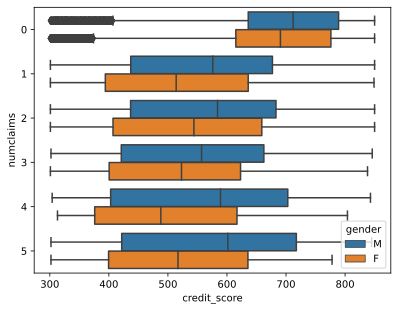

In [214]:
###### Credit score and numclaims across gender ###### 
sns.boxplot(x='credit_score',y='numclaims',data=df_historical,orient='h', hue = 'gender')

<AxesSubplot: xlabel='traffic_index', ylabel='numclaims'>

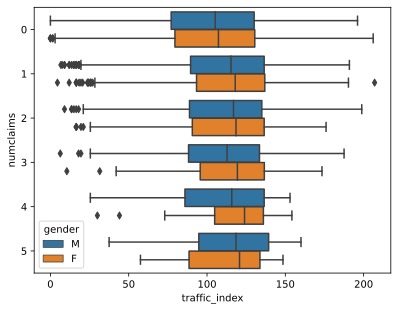

In [215]:
###### Traffic index and numclaims across gender ###### 
sns.boxplot(x='traffic_index',y='numclaims',data=df_historical,orient='h', hue = 'gender')

<AxesSubplot: xlabel='age', ylabel='numclaims'>

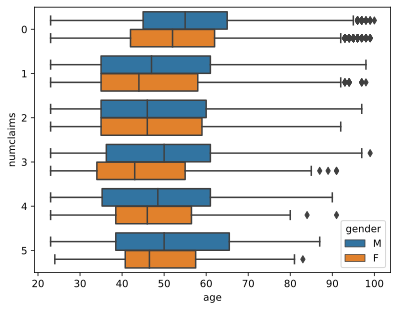

In [216]:
###### Age and numclaims across gender ###### 
sns.boxplot(x='age',y='numclaims',data=df_historical,orient='h', hue = 'gender')

In [217]:
###### Column transformation and pivot_tables ###### 
try:
    df_historical['claimcst0'] = df_historical['claimcst0'].apply(lambda x: x.replace(',',''))
    df_historical['claimcst0'] = df_historical['claimcst0'].astype(float)
except:
    pass
pd.options.display.float_format = '${:,.0f}'.format
#pd.pivot_table(df_historical,index="numclaims",aggfunc='sum')
#pd.pivot_table(df_historical,index=["numclaims","gender"],aggfunc=[np.sum,np.mean],values=['annual_premium','claimcst0'])
#pd.pivot_table(df_historical,index=["numclaims"],aggfunc=[np.mean, np.sum],values=['annual_premium','claimcst0'])
#pd.pivot_table(df_historical,index=["numclaims","gender"],aggfunc=[len,'median',np.mean, np.sum, np.std],values=['claimcst0'])
average_claim = pd.pivot_table(df_historical[df_historical['numclaims']>0],index=["numclaims"],aggfunc=['median',np.mean],values=['claimcst0'])



In [16]:
###### Pivot_table annual_premium mean|total vs claim mean|total across numclaims  ###### 
pd.pivot_table(df_historical,index=["numclaims"],aggfunc=[np.mean, np.sum],values=['annual_premium','claimcst0'])

mean                      sum            
          annual_premium claimcst0 annual_premium   claimcst0
numclaims                                                    
0                   $717        $0    $36,085,884          $0
1                   $717    $3,142     $5,756,602 $25,240,235
2                   $717    $5,633       $957,284  $7,525,126
3                   $717    $8,263       $328,887  $3,792,636
4                   $717   $11,243       $106,763  $1,675,230
5                   $717   $13,695        $37,260    $712,116

In [17]:
###### Pivot_table annual_premium mean|total vs claim mean|total across numclaims and gender ###### 
pd.pivot_table(df_historical,index=["numclaims","gender"],aggfunc=[np.sum,np.mean],values=['annual_premium','claimcst0'])

sum                       mean          
                 annual_premium   claimcst0 annual_premium claimcst0
numclaims gender                                                    
0         F         $22,256,855          $0           $717        $0
          M         $13,829,029          $0           $717        $0
1         F          $1,872,293  $8,016,496           $717    $3,068
          M          $3,884,309 $17,223,739           $717    $3,177
2         F            $298,793  $2,555,062           $717    $6,127
          M            $658,491  $4,970,064           $717    $5,408
3         F            $112,495  $1,188,707           $717    $7,571
          M            $216,392  $2,603,929           $717    $8,622
4         F             $33,677    $686,577           $717   $14,608
          M             $73,086    $988,653           $717    $9,693
5         F             $14,331    $307,027           $717   $15,351
          M             $22,929    $405,089           $717   $12,659

In [18]:
###### Pivot_table annual_premium count|median|mean|sum|std vs claim count|median|mean|sum|std across numclaims and gender ###### 
pd.pivot_table(df_historical,index=["numclaims","gender"],aggfunc=[len,'median',np.mean, np.sum, np.std],values=['claimcst0'])

len    median      mean         sum       std
                 claimcst0 claimcst0 claimcst0   claimcst0 claimcst0
numclaims gender                                                    
0         F          31062        $0        $0          $0        $0
          M          19300        $0        $0          $0        $0
1         F           2613    $1,257    $3,068  $8,016,496    $5,653
          M           5421    $1,045    $3,177 $17,223,739    $6,464
2         F            417    $2,961    $6,127  $2,555,062    $8,892
          M            919    $2,227    $5,408  $4,970,064    $8,809
3         F            157    $4,240    $7,571  $1,188,707   $10,330
          M            302    $3,274    $8,622  $2,603,929   $12,884
4         F             47    $5,690   $14,608    $686,577   $16,656
          M            102    $4,762    $9,693    $988,653   $12,607
5         F             20    $7,246   $15,351    $307,027   $17,350
          M             32    $6,820   $12,659    $405,089   $14,765

In [140]:
###### Missing data in relative terms ###### 
pd.options.display.float_format = None
FZ.percent_missing(df_historical)

credit_score      4.638032
traffic_index     5.800437
agecat            7.999404
claim_office     83.391840
dtype: float64

<AxesSubplot: >

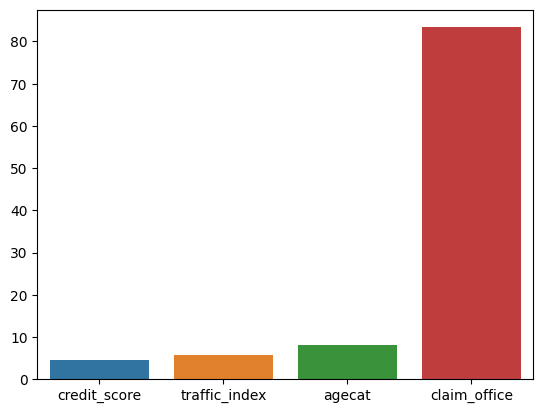

In [20]:
###### Missing data in relative terms graphically ###### 
percent_nan = FZ.percent_missing(df_historical)
sns.barplot(x=percent_nan.index,y=percent_nan)

<AxesSubplot: xlabel='credit_score', ylabel='age'>

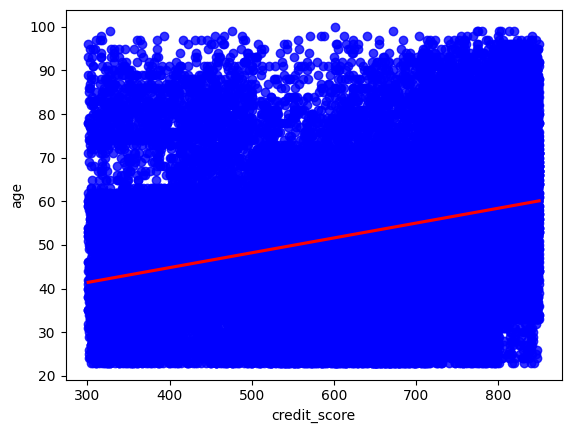

In [21]:
###### Plotting age|credit scorerelationship ###### 
sns.regplot(x = df_historical['credit_score'],
            y = df_historical['age'],
            ci = None,
            scatter_kws={"color": "blue"},
            line_kws={"color": "red"},
            data = df_historical)

In [22]:
###### Dealing with missing data| Imputing Missing data based on other Features ###### 
## Agecat based on bins 1900,1949,1959,1969,1979,1989,1999 ##
## credit_score based on grouped agecat means ## 
## traffic_index based on traffic_index mean ##
## transforming vehicle values to to logarithmic form ##
## Droping some unnecessary columns ##
FZ.missing_value(df_historical)
FZ.missing_value(df_2023)
df_historical.drop(["agecat","credit_score","pol_number","pol_eff_dt","date_of_birth","claim_office", "DOB_year","annual_premium","age"],axis=1,inplace=True)
df_historical.rename(columns = {'credit_score_2':'credit_score', 'agecat_reclass':'agecat','claimcst0':'claim_value'}, inplace = True)
df_2023.drop(["agecat","credit_score","DOB_year", "quote_number", "date_of_birth"],axis=1,inplace=True)
df_2023.rename(columns = {'credit_score_2':'credit_score', 'agecat_reclass':'agecat'}, inplace = True)


In [23]:
###### Last adjustments, creating dummy variables, changing claim categories to 0|1. Claim category 0 = No Claim. Claim category 1 = [1,5] Claims.   ######
df_historical["claim"] = df_historical["numclaims"].apply(FZ.claim)
df_historical=pd.get_dummies(data=df_historical, columns=['gender', 'area','veh_body'],drop_first=True)
df_2023=pd.get_dummies(data=df_2023, columns=['gender', 'area','veh_body'],drop_first=True)
X=df_historical.drop(["numclaims","claim_value","claim"],axis=1)
X_low_claim = df_historical.drop(["claim"],axis=1)
y1=df_historical["claim_value"]
y=df_historical["claim"]
x_2023_predict_data=df_2023
x_2023_predict_data_high_risk=df_2023.copy()

In [24]:
###### Importing libraries, splitting and transforming data ######
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error, r2_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
###### Tuning hyperparameters, computation may take up to 30 mins ######
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver="saga", max_iter=5000)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.8547596553234422


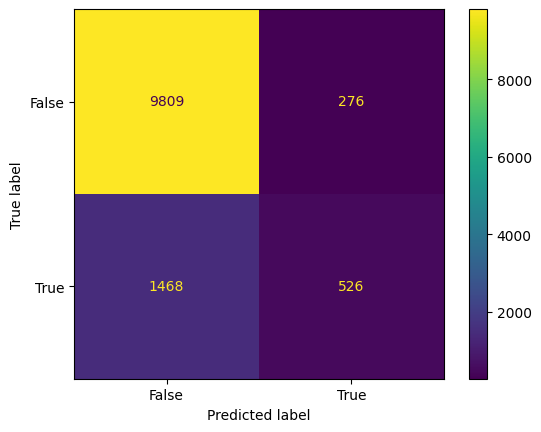

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     10085
           1       0.66      0.26      0.38      1994

    accuracy                           0.86     12079
   macro avg       0.76      0.62      0.65     12079
weighted avg       0.83      0.86      0.83     12079



In [26]:
###### Model & Results ######
log_model = LogisticRegression(C=1.0,penalty="l2")
log_model.fit(scaled_X_train,y_train)
log_model.coef_
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)
y_pred
confusion_matrix(y_test,y_pred)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(classification_report(y_test,y_pred))

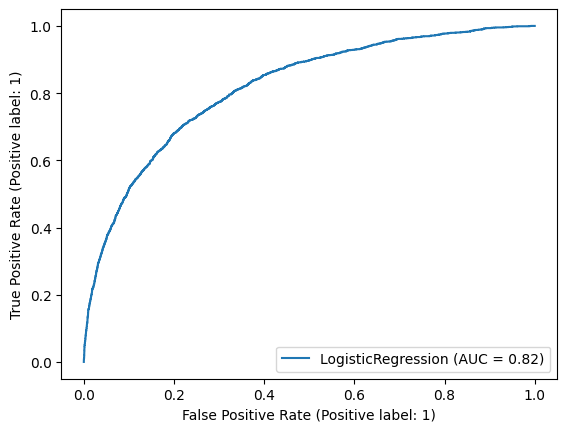

In [27]:
###### ROC Curve ######
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test)

# Preparing and predicting 2023_customers #


In [28]:
scaler = StandardScaler()
scaled_X_test_2023_predict_data = scaler.fit_transform(x_2023_predict_data)

In [29]:
#log_model = LogisticRegression(C=1.0,penalty="l2")
#log_model.fit(scaled_X_train,y_train)
#log_model.coef_
y_pred_2023_predict_data = log_model.predict(scaled_X_test_2023_predict_data)
y_pred_2023_predict_data

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
# Prediction count #
unique, counts = np.unique(y_pred_2023_predict_data, return_counts=True)
dict(zip(unique, counts))

{0: 6964, 1: 500}

In [31]:
# First column is probability of person making 0 claims
# Second column is probability of person making at least 1 claim
y_pred_2023_predict_data = log_model.predict_proba(scaled_X_test_2023_predict_data)
y_pred_2023_predict_data

array([[0.96517022, 0.03482978],
       [0.60067713, 0.39932287],
       [0.17505116, 0.82494884],
       ...,
       [0.92775942, 0.07224058],
       [0.90708104, 0.09291896],
       [0.78732581, 0.21267419]])

In [32]:
# Adding probability results to data_set. Probability_of_No_claim - Probability of customer not making a claim. Probability_of_claim - Probability of customer making a claim. #
x_2023_predict_data['Probability_of_No_claim'] = y_pred_2023_predict_data[:,0].round(2)
x_2023_predict_data['Probability_of_claim'] = y_pred_2023_predict_data[:,1].round(2)

In [33]:
# Saving results #
x_2023_predict_data.to_excel(r'C:\Users\roboz.DESKTOP-F86F289\Desktop\Case_study\x_2023_predict_data.xlsx')

In [34]:
# Some additional divison of claim prediction based on model probability. yes_90 are customers that are expected to make a claim with probability above 90%. yes_75 are customers that are expected to make a claim with probability between 75% - 90% etc.  #
yes_90 = []
yes_75 = []
yes_50 = []
yes_10 = []
yes_0 = []
[yes_90.append(x)for x in y_pred_2023_predict_data if x[1] > 0.9]
[yes_75.append(x)for x in y_pred_2023_predict_data if x[1] > 0.75 and x[1] < 0.9]
[yes_50.append(x)for x in y_pred_2023_predict_data if x[1] > 0.50 and x[1] < 0.75]
[yes_10.append(x)for x in y_pred_2023_predict_data if x[1] > 0.10 and x[1] < 0.50]
[yes_50.append(x)for x in y_pred_2023_predict_data if x[1] > 0.00 and x[1] < 0.10]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [35]:
# Count of customers claiming based on probabilities mentioned above #
yes_90 = len(yes_90)
yes_75 = len(yes_75)
yes_50 = len(yes_50)
yes_10 = len(yes_10)
yes_0 = len(yes_0)
total = len(y_pred_2023_predict_data)
no_claim = total - yes_90 - yes_75 - yes_50

In [36]:
# Creating a DataFrame with count of probability ranges #
df_final = pd.DataFrame(data = [total,no_claim,yes_50,yes_75,yes_90],columns = ["Total"], index=['Customers 2023', 'Expected Customers with no Claim','Claim Probability 50-75%','Claim Probability 75-90%','Claim Probability 90-100'])

In [37]:
# df_final.iloc[1:].plot.pie(subplots=True, figsize=(15, 10),shadow = True)

<AxesSubplot: >

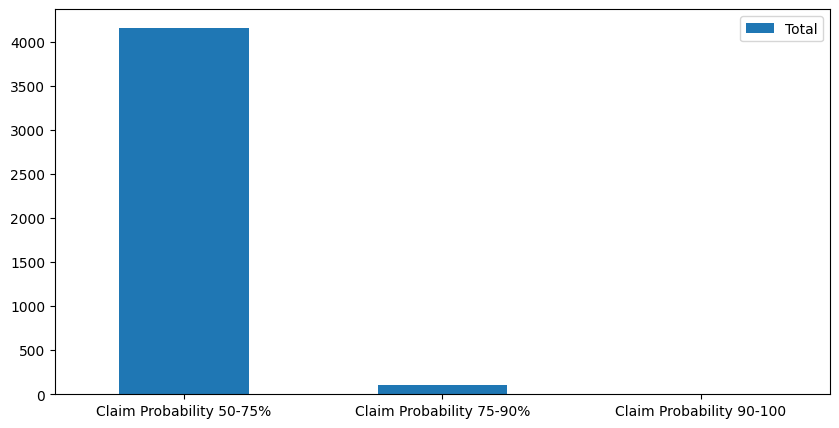

In [38]:
# Plotting Probability Counts #
df_final.iloc[2:].plot.bar(rot=0, figsize=(10, 5))

## Deep Learning Model ##


In [39]:
# Count of customers claiming based on probabilities mentioned above #
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


C:\Users\roboz.DESKTOP-F86F289\AppData\Local\Temp\ipykernel_20408\1654701553.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [40]:
# Z-score transformation #
from scipy.stats import zscore
#columns_z_score = ["traffic_index","veh_age","veh_value","agecat"]
X['agecat'] = X['agecat'].astype(float)
X[["traffic_index","veh_age","veh_value","credit_score", "agecat"]] = X[["traffic_index","veh_age","veh_value","credit_score", "agecat"]].apply(zscore)
X
#X.apply(zscore)

,traffic_index,veh_age,veh_value,agecat,credit_score,gender_M,area_B,area_C,area_D,area_E,...,veh_body_HBACK,veh_body_HDTOP,veh_body_MCARA,veh_body_MIBUS,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE
0,1.131839e+00,1.241752,-0.930350,-1.043311,-0.214227,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,9.972692e-01,0.305465,-0.313520,-1.043311,-0.960862,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-4.615913e-01,0.305465,-0.699107,1.764078,1.331307,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-4.346259e-16,-0.630822,0.321261,1.062231,1.308908,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5.843842e-01,0.305465,-1.101950,0.360384,0.659336,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60387,-4.346259e-16,0.305465,-0.019565,1.062231,1.084918,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
60388,-1.847050e+00,-0.630822,1.395854,-1.043311,-0.371020,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
60389,3.121859e-01,0.305465,1.200992,-0.341464,-0.968328,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
60390,1.714991e-01,0.305465,0.001748,-0.341464,-2.222675,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
# Convert to tensors #
dataT  = torch.tensor(X.values ).float()
labels = torch.tensor(y.values ).float()
labels = labels[:,None] # transform to matrix

In [42]:
# Splitting data #
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labels, test_size=.2)

# then convert to PyTorch Datasets #
train_dataDataset = torch.utils.data.TensorDataset(train_data,train_labels)
test_dataDataset  = torch.utils.data.TensorDataset(test_data,test_labels)

# creating dataloaders
train_loader = DataLoader(train_dataDataset,batch_size=32, shuffle=True, drop_last=True)
test_loader  = DataLoader(test_dataDataset,batch_size=test_dataDataset.tensors[0].shape[0])

In [43]:
# Insurance class #
class ANNinsurance(nn.Module):
  def __init__(self):
    super().__init__()

    ### input layer
    self.input = nn.Linear(23,16)
    
    ### hidden layers
    self.fc1 = nn.Linear(16,32)
    self.fc2 = nn.Linear(32,32)

    ### output layer
    self.output = nn.Linear(32,1)
  
  # forward pass
  def forward(self,x):
    x = F.relu( self.input(x) )
    x = F.relu( self.fc1(x) )
    x = F.relu( self.fc2(x) )
    return self.output(x)

In [44]:
# global parameter
numepochs = 5000

def trainTheModel():

  # loss function and optimizer
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(Insurancenet.parameters(),lr=.01)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = Insurancenet(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute training accuracy for this batch
      batchAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
    # end of batch loop...

    # average training accuracy through the batches
    trainAcc.append( np.mean(batchAcc) )

    # average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = Insurancenet(X)
    testAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
  
  # function output
  return trainAcc,testAcc,losses


In [45]:
# training the model, will take up to 2.5 hours, change numepochs to 1000 to run approx 0.5 hours deppending on your pc #
Insurancenet = ANNinsurance()
trainAcc,testAcc,losses = trainTheModel()

In [46]:
train_predictions = Insurancenet(train_loader.dataset.tensors[0])
train_predictions


# predictions for test data
test_predictions = Insurancenet(test_loader.dataset.tensors[0])
test_predictions


tensor([[-0.8134],
        [-3.1852],
        [-1.4510],
        ...,
        [-3.7452],
        [-2.3062],
        [-2.7579]], grad_fn=<AddmmBackward0>)

In [47]:
import sklearn.metrics as skm

# initialize vectors
train_metrics = [0,0,0,0]
test_metrics  = [0,0,0,0]

# training results
train_metrics[0] = skm.accuracy_score (train_loader.dataset.tensors[1],train_predictions>0)
train_metrics[1] = skm.precision_score(train_loader.dataset.tensors[1],train_predictions>0)
train_metrics[2] = skm.recall_score   (train_loader.dataset.tensors[1],train_predictions>0)
train_metrics[3] = skm.f1_score       (train_loader.dataset.tensors[1],train_predictions>0)


# test results
test_metrics[0] = skm.accuracy_score (test_loader.dataset.tensors[1],test_predictions>0)
test_metrics[1] = skm.precision_score(test_loader.dataset.tensors[1],test_predictions>0)
test_metrics[2] = skm.recall_score   (test_loader.dataset.tensors[1],test_predictions>0)
test_metrics[3] = skm.f1_score       (test_loader.dataset.tensors[1],test_predictions>0)


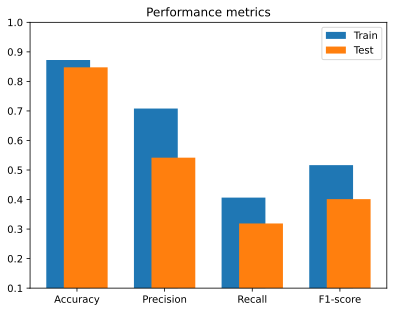

In [48]:
# Plotting results #
plt.bar(np.arange(4)-.1,train_metrics,.5)
plt.bar(np.arange(4)+.1,test_metrics,.5)
plt.xticks([0,1,2,3],['Accuracy','Precision','Recall','F1-score'])
plt.ylim([.1,1])
plt.legend(['Train','Test'])
plt.title('Performance metrics')
plt.show()

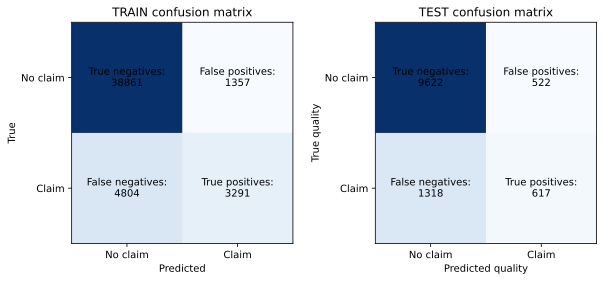

array([[38861,  1357],
       [ 4804,  3291]], dtype=int64)

In [49]:
# Plotting Train|Test confusion matrices #
rainConf = skm.confusion_matrix(train_loader.dataset.tensors[1],train_predictions>0)
testConf  = skm.confusion_matrix(test_loader.dataset.tensors[1], test_predictions>0)

fig,ax = plt.subplots(1,2,figsize=(10,4))

# confmat during TRAIN
ax[0].imshow(trainConf,'Blues',vmax=len(train_predictions)/2)
ax[0].set_xticks([0,1])
ax[0].set_yticks([0,1])
ax[0].set_xticklabels(['No claim','Claim'])
ax[0].set_yticklabels(['No claim','Claim'])
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')
ax[0].set_title('TRAIN confusion matrix')

# add text labels
ax[0].text(0,0,f'True negatives:\n{trainConf[0,0]}' ,ha='center',va='center')
ax[0].text(0,1,f'False negatives:\n{trainConf[1,0]}',ha='center',va='center')
ax[0].text(1,1,f'True positives:\n{trainConf[1,1]}' ,ha='center',va='center')
ax[0].text(1,0,f'False positives:\n{trainConf[0,1]}',ha='center',va='center')




# confmat during TEST
ax[1].imshow(testConf,'Blues',vmax=len(test_predictions)/2)
ax[1].set_xticks([0,1])
ax[1].set_yticks([0,1])
ax[1].set_xticklabels(['No claim','Claim'])
ax[1].set_yticklabels(['No claim','Claim'])
ax[1].set_xlabel('Predicted quality')
ax[1].set_ylabel('True quality')
ax[1].set_title('TEST confusion matrix')

# add text labels
ax[1].text(0,0,f'True negatives:\n{testConf[0,0]}' ,ha='center',va='center')
ax[1].text(0,1,f'False negatives:\n{testConf[1,0]}',ha='center',va='center')
ax[1].text(1,1,f'True positives:\n{testConf[1,1]}' ,ha='center',va='center')
ax[1].text(1,0,f'False positives:\n{testConf[0,1]}',ha='center',va='center')
plt.show()

trainConf

After 5k epochs, DL model seems to be little more accurate preddicting Claims. Due to limited time we have decided to carry on with results coming from log. reg.

# RISKY vs LESS-RISKY MODEL #

C:\Users\roboz.DESKTOP-F86F289\AppData\Local\Temp\ipykernel_20408\2088814149.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_low_claim_corr =X_low_claim.drop(["numclaims","claim_value"],axis=1).corr().round(2)


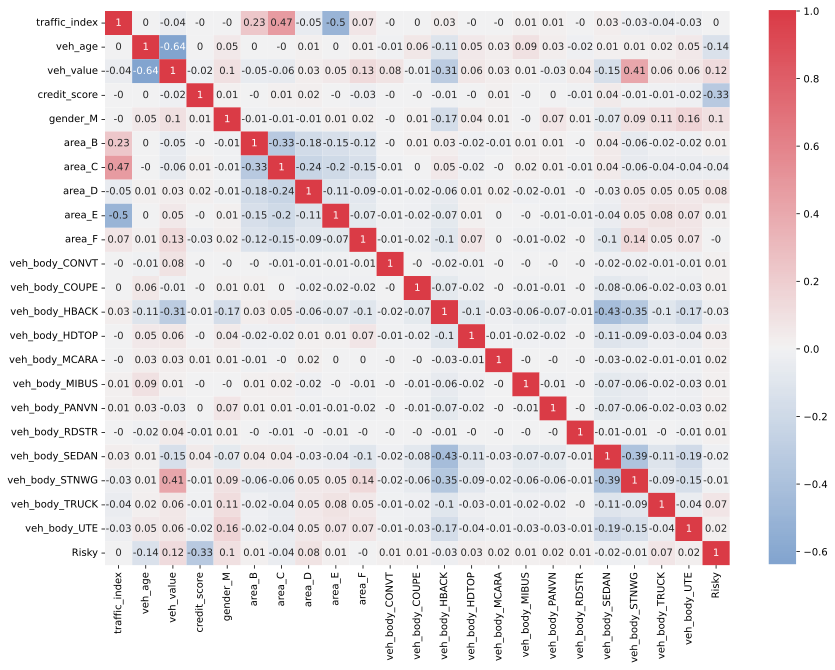

In [127]:
# Transforming to second part of an assignment. Changing outcome to 0-1 based on cost per claim. If customer average cost per claim was above 3k (individually selected, approx. 4x times higher than annual insurance), we consider him risky = 1. If Cost per Claim was less than 3k, we consider him Less Risky. # 
X_low_claim = df_historical.drop(["claim"],axis=1)
X_low_claim['Risky'] = X_low_claim['claim_value']/X_low_claim['numclaims']
X_low_claim['Risky']  = X_low_claim[X_low_claim['numclaims'] >0]['Risky'].apply(FZ.risky)
X_low_claim['Risky'] = X_low_claim['Risky'].fillna(0)
#X_low_claim['veh_value'] = X_low_claim['veh_value']*ten_thousand
X_low_claim['veh_value'] = (X_low_claim['veh_value']+1).apply(np.log)
#df_historical_plot = df_historical_plot.drop(['claim'],axis = 1)
#df_historical_plot['veh_value'] = df_historical_plot['veh_value']*ten_thousand
X_low_claim_corr =X_low_claim.drop(["numclaims","claim_value"],axis=1).corr().round(2)
fig = plt.figure(figsize=(14,10));
sns.heatmap(X_low_claim_corr, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

y_low_claim=X_low_claim["Risky"]
X_low_claim = X_low_claim.drop(["numclaims","claim_value","Risky"],axis=1)

In [90]:
# Splitting and scaling of the model #
X_train, X_test, y_train, y_test = train_test_split(X_low_claim, y_low_claim, test_size=0.2, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [54]:
###### Tuning hyperparameters, computation may take up to 30 mins ######
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver="saga", max_iter=5000)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.961645933889985


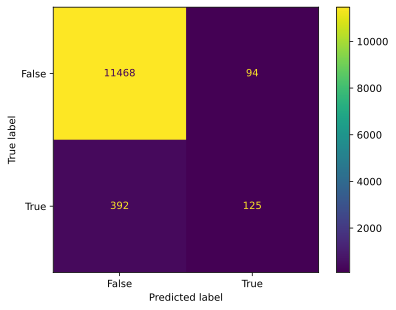

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     11562
         1.0       0.57      0.24      0.34       517

    accuracy                           0.96     12079
   macro avg       0.77      0.62      0.66     12079
weighted avg       0.95      0.96      0.95     12079



In [91]:
# Model Results, confusion matrix #
log_model = LogisticRegression(C=0.1,penalty="l2")
log_model.fit(scaled_X_train,y_train)
log_model.coef_
y_pred_2023_predict_data_high_risk = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)
y_pred

#confusion_matrix(y_test,y_pred)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(classification_report(y_test,y_pred))


In [129]:
# Predicting 2023_customers and saving results #
x_2023_predict_data=df_2023.copy()
x_2023_predict_data = x_2023_predict_data.drop(['Probability_of_No_claim','Probability_of_claim'],axis = 1)
scaler = StandardScaler()
scaled_X_test_2023_predict_data = scaler.fit_transform(x_2023_predict_data)

y_pred_2023_predict_data = log_model.predict(scaled_X_test_2023_predict_data)
y_pred_2023_predict_data

y_pred_2023_predict_data = log_model.predict_proba(scaled_X_test_2023_predict_data)
y_pred_2023_predict_data

x_2023_predict_data['Low_cost_per_claim_probability'] = y_pred_2023_predict_data[:,0].round(2)
x_2023_predict_data['High_cost_per_claim_probability'] = y_pred_2023_predict_data[:,1].round(2)
x_2023_predict_data.to_excel(r'C:\Users\roboz.DESKTOP-F86F289\Desktop\Case_study\x_2023_predict_data_high_risk.xlsx')
